<h1>Istrazivacka analiza podataka</h1>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import sklearn.metrics as sk

In [3]:
df = pd.read_csv("D:\\Faks\\Master\\ML\\banking.csv")
# df = pd.read_csv("datasets/bank-additional-full.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.shape

(41188, 21)

In [5]:
print('Jobs:\n', df['job'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [6]:
print('Marital:\n', df['marital'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']


In [7]:
print('Education:\n', df['education'].unique())

Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [8]:
print('Default:\n', df['default'].unique())
print('Housing:\n', df['housing'].unique())
print('Loan:\n', df['loan'].unique())

Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


In [6]:
df = df[~df.apply(lambda row: (row == 'unknown').any(), axis=1)]

In [7]:
df.shape

(30488, 21)

<h3>Detekcija outlier-a</h3>

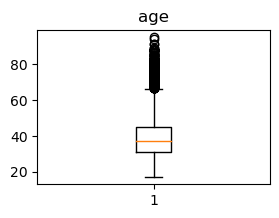

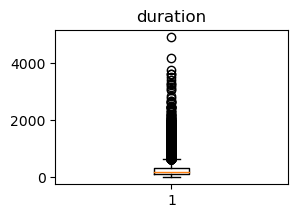

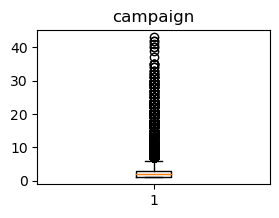

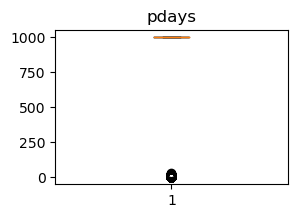

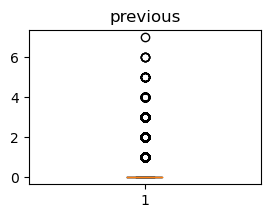

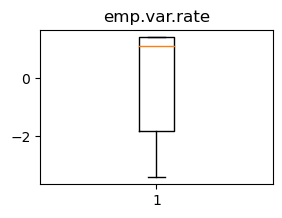

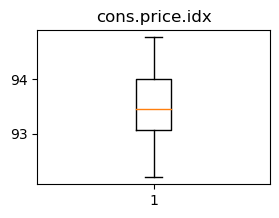

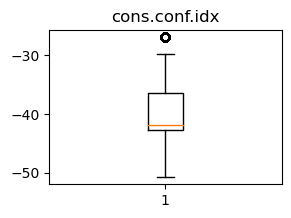

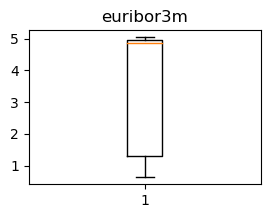

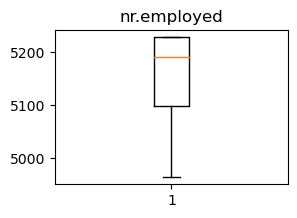

In [11]:
columns_numeric = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed' ]
for i, column in enumerate(columns_numeric):
        plt.figure(figsize=(3, 2), dpi=100)
        plt.boxplot(df[column])
        plt.title(column)
        plt.show()

<h3>Izbacivanje outlier-a</h3>

In [8]:
columns_with_outliers = ['age', 'duration', 'campaign']
Q1 = df[columns_with_outliers].quantile(0.25)
Q3 = df[columns_with_outliers].quantile(0.75)
IQR = Q3-Q1

In [9]:
IQR

age          14.0
duration    218.0
campaign      2.0
dtype: float64

In [10]:
df_without_outliers = df
for i, column in enumerate(columns_with_outliers):
    df_without_outliers = df_without_outliers[(df_without_outliers[column] >= Q1[i] - 1.5 * IQR[i]) & (df_without_outliers[column] <= Q3[i] + 1.5 * IQR[i])]

In [11]:
df_without_outliers.shape

(26329, 21)

In [12]:
df_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26329 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             26329 non-null  int64  
 1   job             26329 non-null  object 
 2   marital         26329 non-null  object 
 3   education       26329 non-null  object 
 4   default         26329 non-null  object 
 5   housing         26329 non-null  object 
 6   loan            26329 non-null  object 
 7   contact         26329 non-null  object 
 8   month           26329 non-null  object 
 9   day_of_week     26329 non-null  object 
 10  duration        26329 non-null  int64  
 11  campaign        26329 non-null  int64  
 12  pdays           26329 non-null  int64  
 13  previous        26329 non-null  int64  
 14  poutcome        26329 non-null  object 
 15  emp.var.rate    26329 non-null  float64
 16  cons.price.idx  26329 non-null  float64
 17  cons.conf.idx   26329 non-null 

In [13]:
mapiranje = {'yes': 1, 'no': 0}
df_without_outliers['y'] = df_without_outliers['y'].map(mapiranje)

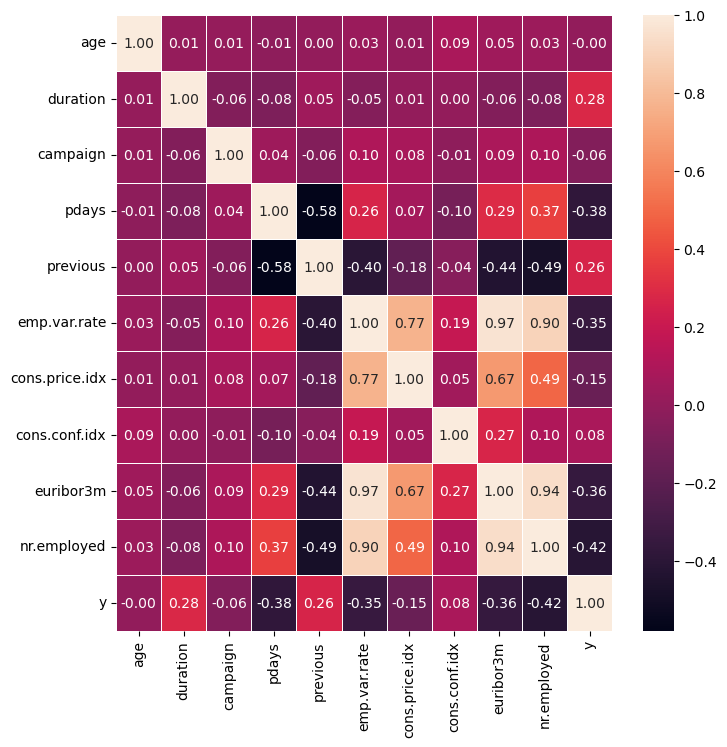

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(df_without_outliers.corr(),annot=True,linewidths=0.7,fmt=".2f")
plt.show()

In [15]:
columns_to_drop = ['emp.var.rate', 'euribor3m']
df_dropped = df_without_outliers.drop(columns_to_drop, axis = 1)

<h3>One hot encoding</h3> 

In [16]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
encoded_columns = pd.get_dummies(df_dropped[categorical_columns], prefix=categorical_columns)
df_encoded = pd.concat([df_dropped, encoded_columns], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)

<h3>Skaliranje</h3>

In [17]:
#Creating binary classification target variable
df_target=df_encoded[['y']].values
df_features=df_encoded.drop(columns=['y'],axis=1).values
x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.3, random_state = 0)

In [18]:
sc = StandardScaler()
x1_train_scaled = sc.fit_transform(x1_train)
x1_test_scaled = sc.transform(x1_test)

<h3>Funkcije za evaluaciju</h3>

In [19]:
def confusionmat(y,y_hat):
  from sklearn.metrics import confusion_matrix,accuracy_score
  cm = confusion_matrix(y, y_hat)
  accu=accuracy_score(y,y_hat)
  print(cm,"\n")
  print("The accuracy is",accu)

In [20]:
def learningcurve(history):
  # list all data in history
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

<h3>Razlicite vrednosti za broj epoha</h3>

In [25]:
# Initialising the ANN
model = Sequential()

model.add(Dense(16,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

epoch=[100,250,500]

247/247 [==============================] - 2s 6ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 0.1862 - accuracy: 0.9225
For epoch = 100, the model test accuracy is 0.9225218296051025.
The model test average precision score is 0.5787588857304611.
[[6927  204]
 [ 408  360]] 

The accuracy is 0.9

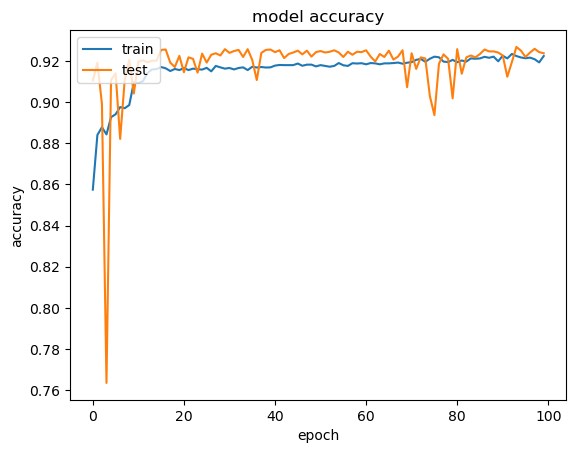

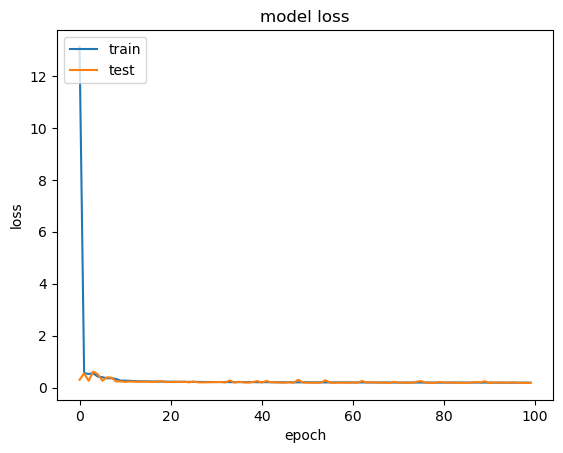

247/247 [==============================] - 1s 3ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 0.2056 - accuracy: 0.9244
For epoch = 250, the model test accuracy is 0.9244208335876465.
The model test average precision score is 0.5876594946466954.
[[6992  139]
 [ 458  310]] 

The accuracy is 0.9

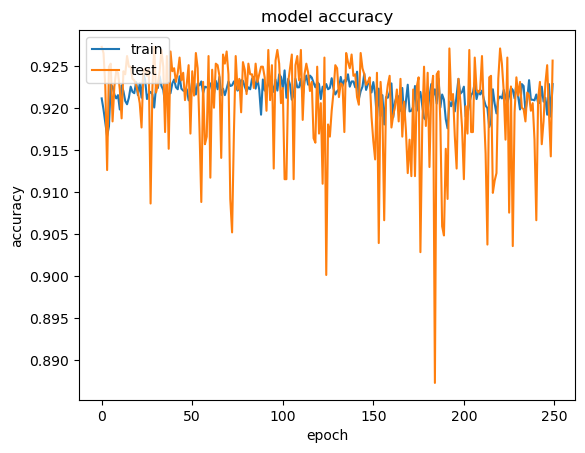

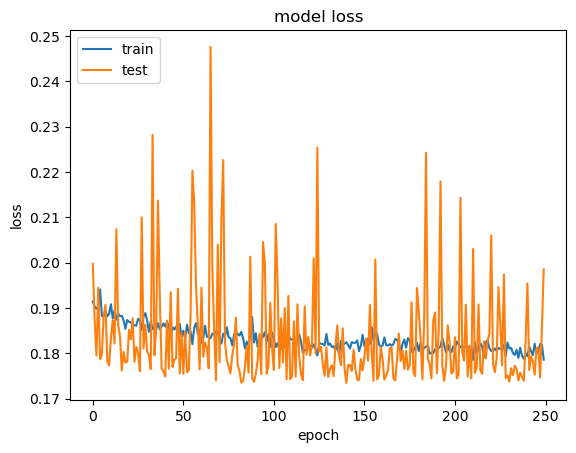

247/247 [==============================] - 2s 8ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 2s 7ms/step - loss: 0.1887 - accuracy: 0.9180
For epoch = 500, the model test accuracy is 0.9179642796516418.
The model test average precision score is 0.5315742787768887.
[[7028  103]
 [ 545  223]] 

The accuracy is 0.9

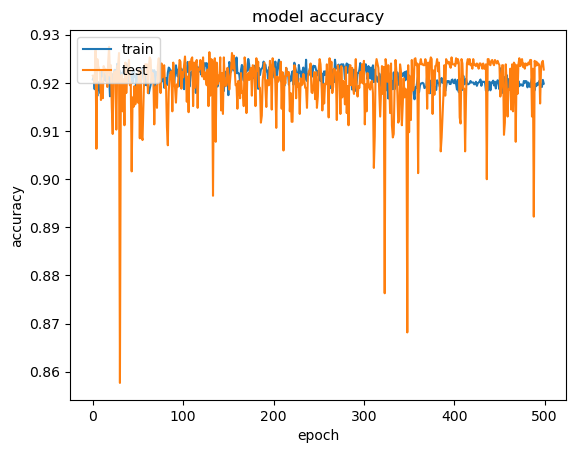

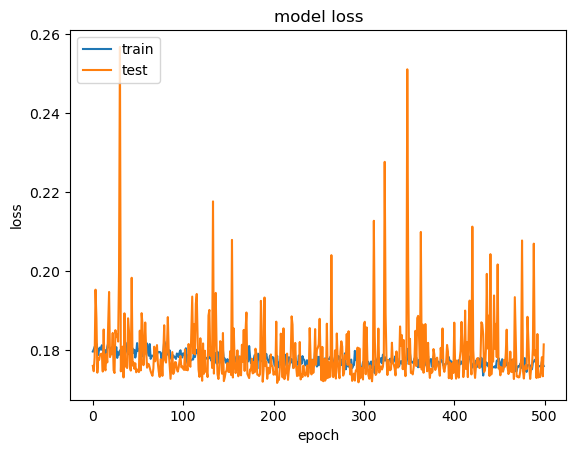

In [26]:
for e in epoch:
  # Fitting the ANN to the Training set
  history=model.fit(x1_train, y1_train, batch_size = 10, epochs=e,validation_split=0.3, verbose=0)
  # Predicting the Test set results
  y_pred_prob = model.predict(x1_test)
  y_pred = (y_pred_prob > 0.5).astype(int)
  pre_score = sk.average_precision_score(y1_test, y_pred_prob)
  model.summary()
  test_results = model.evaluate(x1_test, y1_test)
  print("For epoch = {0}, the model test accuracy is {1}.".format(e,test_results[1]))
  print("The model test average precision score is {}.".format(pre_score))
  confusionmat(y1_test,y_pred)
  learningcurve(history)

<h4>Scaled Dataset</h4>

247/247 [==============================] - 2s 5ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 5ms/step - loss: 0.2939 - accuracy: 0.9075
For epoch = 100, the model test accuracy is 0.907456636428833.
The model test average precision score is 0.47451411014348954.
[[6788  343]
 [ 388  380]] 

The accuracy is 0.9

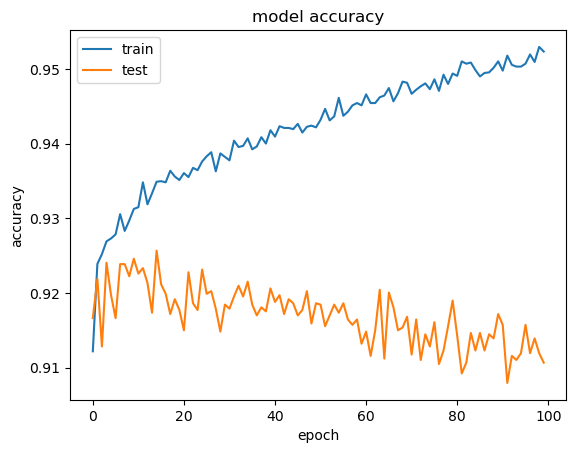

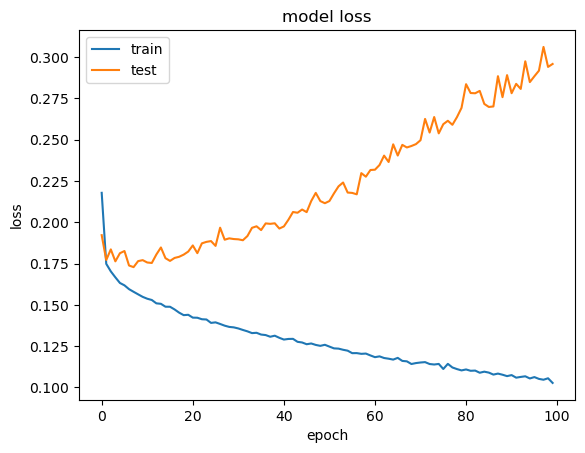

247/247 [==============================] - 1s 4ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 0.6729 - accuracy: 0.9051
For epoch = 250, the model test accuracy is 0.9050512909889221.
The model test average precision score is 0.42850956974425475.
[[6730  401]
 [ 349  419]] 

The accuracy is 0.

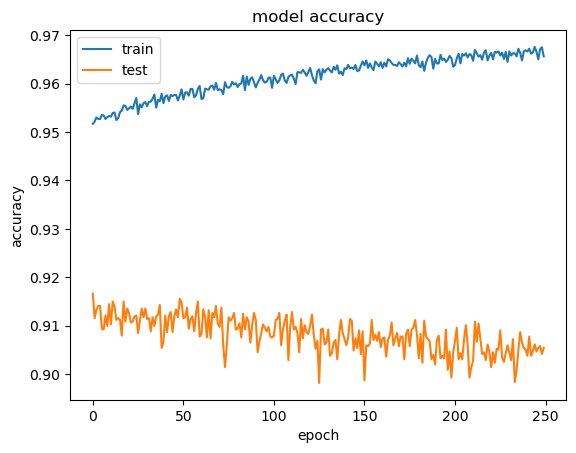

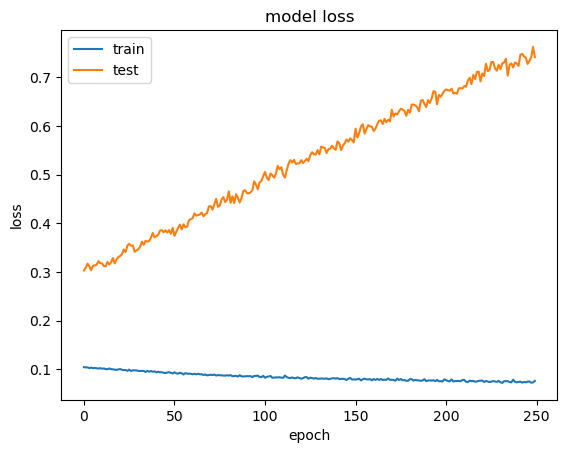

247/247 [==============================] - 1s 3ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 1.4166 - accuracy: 0.9013
For epoch = 500, the model test accuracy is 0.901253342628479.
The model test average precision score is 0.3969897514345018.
[[6741  390]
 [ 390  378]] 

The accuracy is 0.90

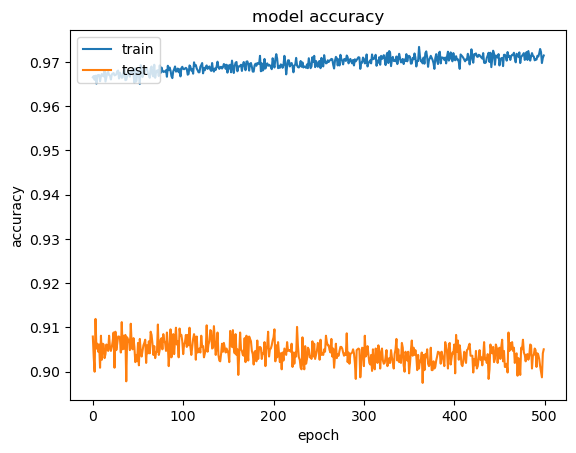

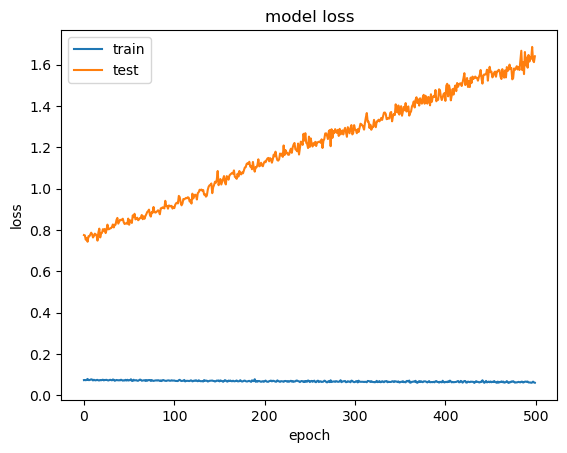

In [28]:
for e in epoch:
  # Fitting the ANN to the Training set
  history=model.fit(x1_train_scaled, y1_train, batch_size = 10, epochs=e,validation_split=0.3, verbose = 0)
  # Predicting the Test set results

  y_pred_prob = model.predict(x1_test_scaled)
  y_pred = (y_pred_prob > 0.5).astype(int)  
  pre_score = sk.average_precision_score(y1_test, y_pred_prob)

  model.summary()
  test_results = model.evaluate(x1_test_scaled, y1_test)
  print("For epoch = {0}, the model test accuracy is {1}.".format(e,test_results[1]))
  print("The model test average precision score is {}.".format(pre_score))
  confusionmat(y1_test,y_pred)
  learningcurve(history)

<h3>Isprobavanje razlicitog broja slojeva</h3>

In [29]:
model = Sequential()

model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

247/247 [==============================] - 1s 3ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                896       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 0.2098 - accuracy: 0.9167
For epoch = 500, the model test accuracy is 0.9166983366012573.
The model test average precision score is 0.5807976543140403.
[[7072   59]
 [ 599  169]] 

The accuracy is 0.9166983162425624
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


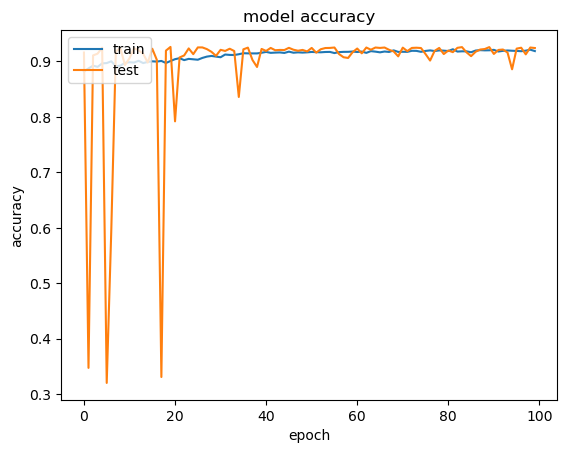

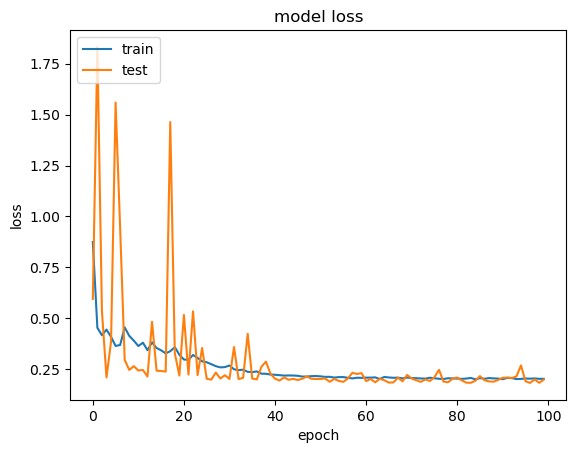

In [30]:
history=model.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3, verbose=0)
# Predicting the Test set results
y_pred_prob = model.predict(x1_test)
y_pred = (y_pred_prob > 0.5).astype(int)
pre_score = sk.average_precision_score(y1_test, y_pred_prob)

model.summary()
test_results = model.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(e,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)

<h4>Scaled Dataset</h4>

247/247 [==============================] - 1s 3ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                896       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 3ms/step - loss: 0.2020 - accuracy: 0.9152
For epoch = 100, the model test accuracy is 0.9151791334152222.
The model test average precision score is 0.5734941887556859.
[[6869  262]
 [ 408  360]] 

The accuracy is 0.9151791365995696
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


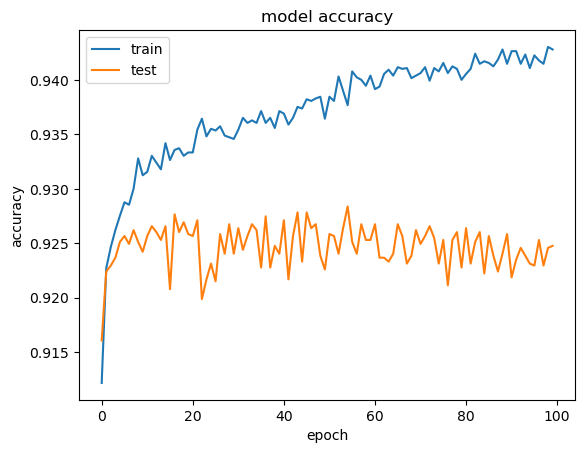

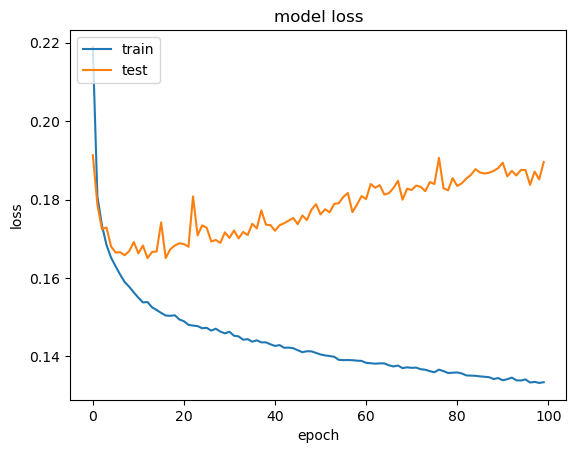

In [31]:
# Fitting the ANN to the Training set
history=model.fit(x1_train_scaled, y1_train, batch_size = 10, epochs=100,validation_split=0.3, verbose = 0)
# Predicting the Test set results

y_pred_prob = model.predict(x1_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y1_test, y_pred_prob)

model.summary()
test_results = model.evaluate(x1_test_scaled, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)

In [38]:
model = Sequential()

model.add(Dense(16,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

247/247 [==============================] - 1s 3ms/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                896       
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 0.1872 - accuracy: 0.9224
For epoch = 500, the model test accuracy is 0.9223952293395996.
The model test average precision score is 0.3390231557357479.
[[6950  181]
 [ 432  336]] 

The accuracy is 0

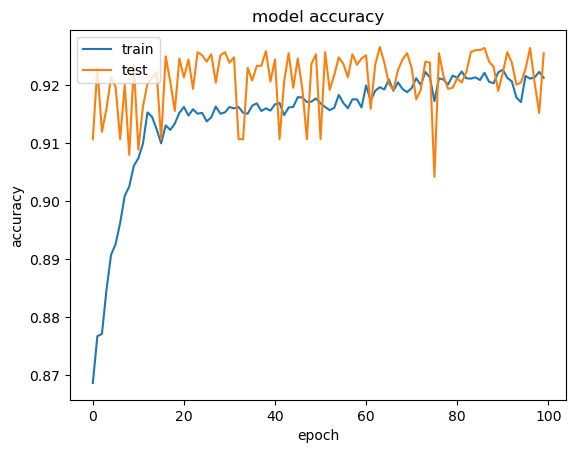

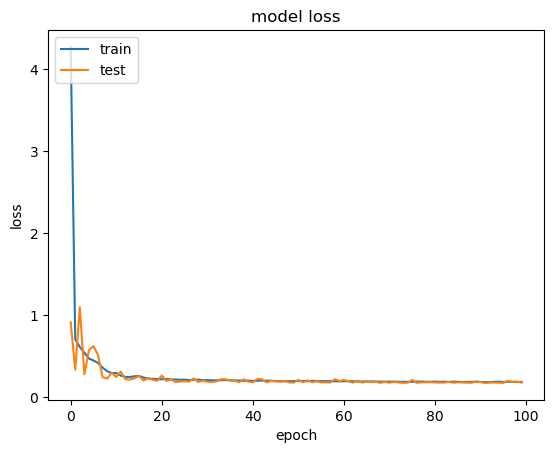

In [33]:
# Fitting the ANN to the Training set
history=model.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3, verbose=0)
# Predicting the Test set results
y_pred_prob = model.predict(x1_test)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y1_test, y_pred)
model.summary()
test_results = model.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(e,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)

<h4>Scaled Dataset</h4>

247/247 [==============================] - 1s 3ms/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                896       
                                                                 
 dense_13 (Dense)            (None, 32)                544       
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 0.5527 - accuracy: 0.9021
For epoch = 100, the model test accuracy is 0.9021394848823547.
The model test average precision score is 0.47801797118153516.
[[6711  420]
 [ 353  415]] 

The accuracy is 

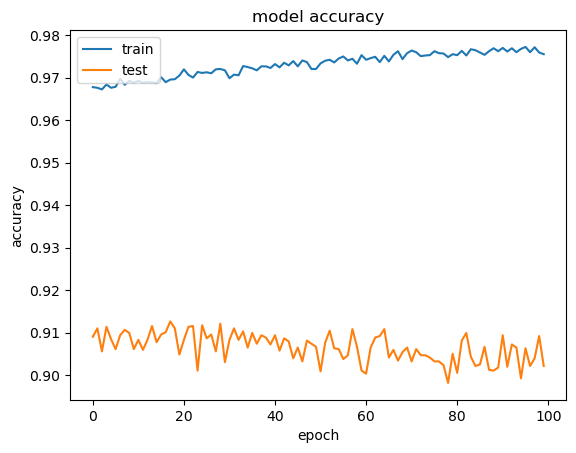

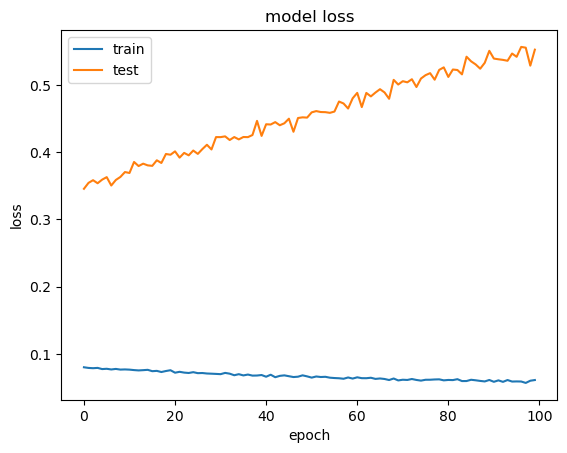

In [40]:
# Fitting the ANN to the Training set
history=model.fit(x1_train_scaled, y1_train, batch_size = 10, epochs=100,validation_split=0.3, verbose = 0)
# Predicting the Test set results
y_pred_prob = model.predict(x1_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y1_test, y_pred_prob)

model.summary()
test_results = model.evaluate(x1_test_scaled, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)

In [41]:
model = Sequential()

model.add(Dense(16,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


247/247 [==============================] - 1s 3ms/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                896       
                                                                 
 dense_16 (Dense)            (None, 32)                544       
                                                                 
 dense_17 (Dense)            (None, 32)                1056      
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,529
Trainable params: 2,529
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 0.1893 - accuracy: 0.9226
For epoch = 500, the model test accuracy

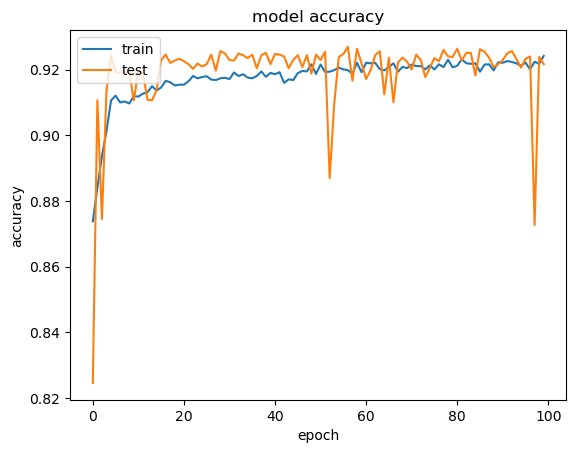

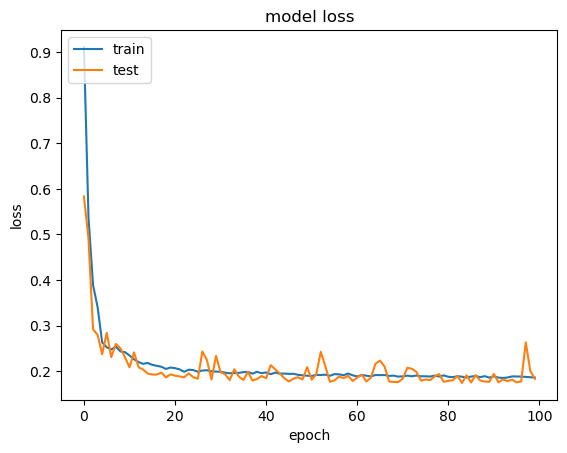

In [42]:
# Fitting the ANN to the Training set
history=model.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3, verbose=0)
# Predicting the Test set results
y_pred_prob = model.predict(x1_test)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y1_test, y_pred)
model.summary()
test_results = model.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(e,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)

<h4>Scaled Dataset</h4>

247/247 [==============================] - 2s 5ms/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                896       
                                                                 
 dense_16 (Dense)            (None, 32)                544       
                                                                 
 dense_17 (Dense)            (None, 32)                1056      
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,529
Trainable params: 2,529
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 0.6516 - accuracy: 0.9048
For epoch = 100, the model test accuracy

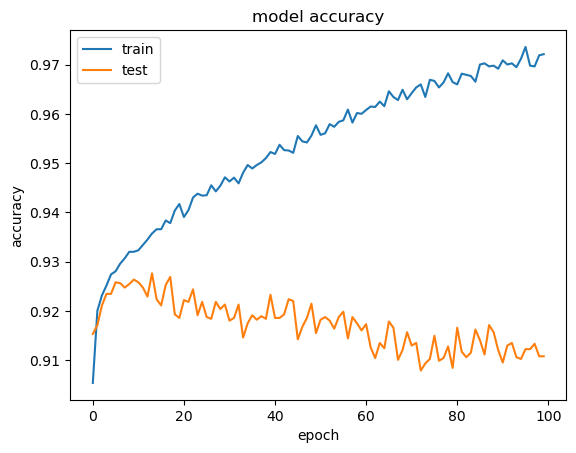

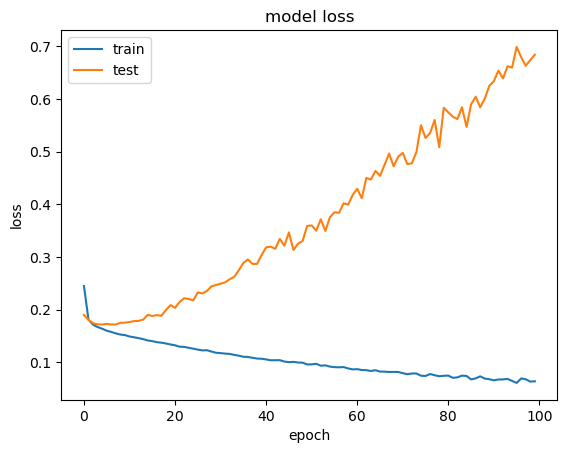

In [43]:
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=model.fit(x1_train_scaled, y1_train, batch_size = 10, epochs=100,validation_split=0.3, verbose = 0)
# Predicting the Test set results
y_pred_prob = model.predict(x1_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y1_test, y_pred_prob)

model.summary()
test_results = model.evaluate(x1_test_scaled, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)

<h3>Isprobavanje razlicitog broja cvorova</h3>

In [44]:
model = Sequential()
model.add(Dense(16,activation="relu"))
model.add(Dense(16,activation="relu"))

model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

247/247 [==============================] - 1s 4ms/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 16)                896       
                                                                 
 dense_20 (Dense)            (None, 16)                272       
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 0.1941 - accuracy: 0.9115
For epoch = 500, the model test accuracy is 0.911507785320282.
The model test average precision score is 0.36483435149908455.
[[6736  395]
 [ 304  464]] 

The accuracy is 0

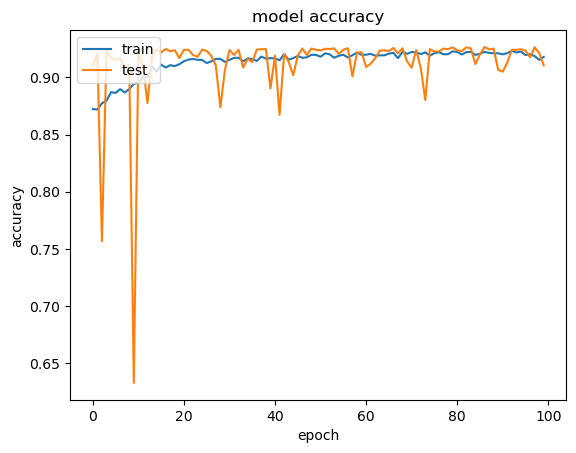

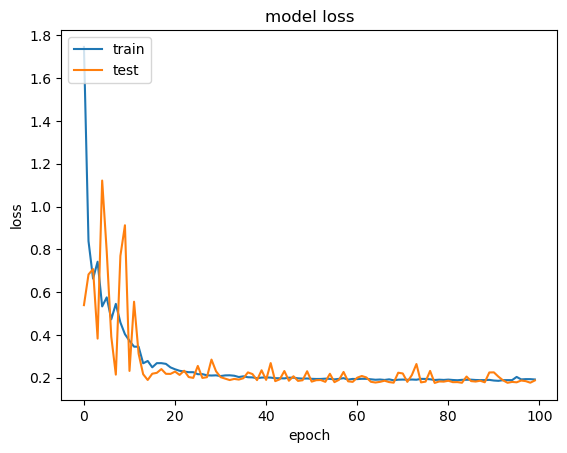

In [45]:
# Fitting the ANN to the Training set
history=model.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3, verbose=0)
# Predicting the Test set results
y_pred_prob = model.predict(x1_test)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y1_test, y_pred)
model.summary()
test_results = model.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(e,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)

<h4>Scaled Dataset</h4>

247/247 [==============================] - 1s 4ms/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 16)                896       
                                                                 
 dense_20 (Dense)            (None, 16)                272       
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 2s 6ms/step - loss: 0.3397 - accuracy: 0.9105
For epoch = 100, the model test accuracy is 0.9104949831962585.
The model test average precision score is 0.4896062330840236.
[[6816  315]
 [ 392  376]] 

The accuracy is 0

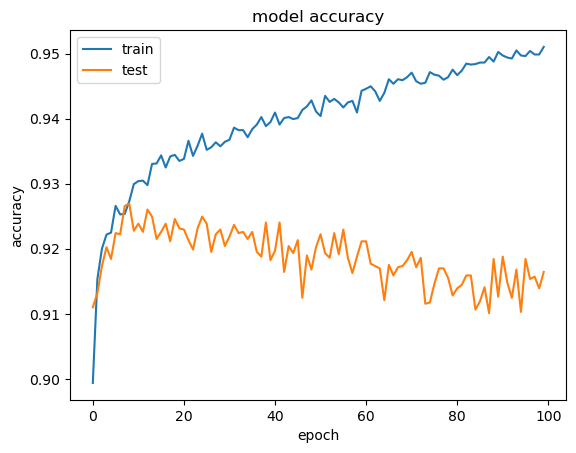

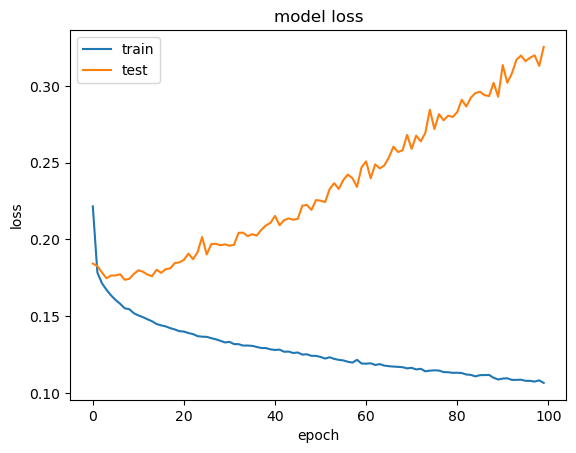

In [46]:
# Fitting the ANN to the Training set
history=model.fit(x1_train_scaled, y1_train, batch_size = 10, epochs=100,validation_split=0.3, verbose = 0)
# Predicting the Test set results
y_pred_prob = model.predict(x1_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y1_test, y_pred_prob)

model.summary()
test_results = model.evaluate(x1_test_scaled, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)

In [47]:
model = Sequential()

model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

247/247 [==============================] - 1s 3ms/step
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                1792      
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dense_24 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 2s 7ms/step - loss: 0.1849 - accuracy: 0.9229
For epoch = 500, the model test accuracy is 0.9229016304016113.
The model test average precision score is 0.354819557820782.
[[6925  206]
 [ 403  365]] 

The accuracy is 0.

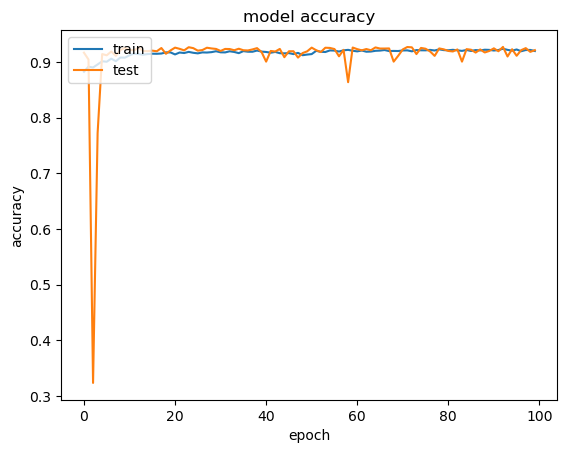

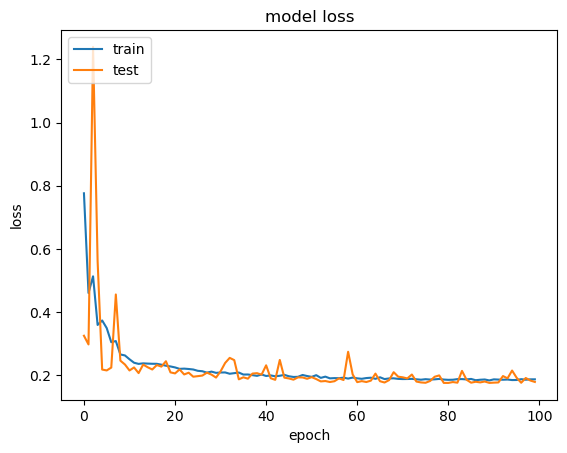

In [48]:
# Fitting the ANN to the Training set
history=model.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3, verbose=0)
# Predicting the Test set results
y_pred_prob = model.predict(x1_test)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y1_test, y_pred)
model.summary()
test_results = model.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(e,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)

<h4>Scaled Dataset</h4>

247/247 [==============================] - 1s 3ms/step
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                1792      
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dense_24 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 0.5266 - accuracy: 0.9057
For epoch = 100, the model test accuracy is 0.9056842923164368.
The model test average precision score is 0.49361067433643563.
[[6707  424]
 [ 321  447]] 

The accuracy is 

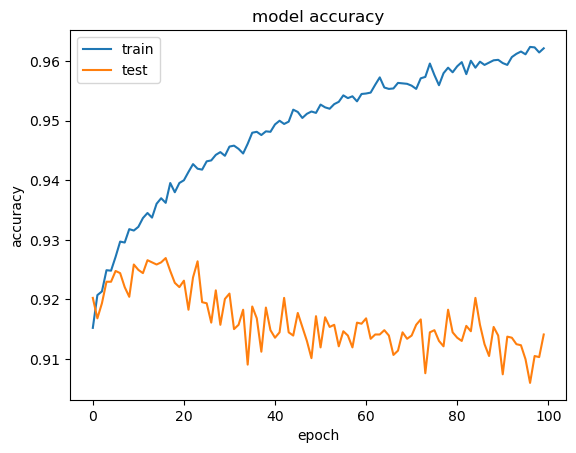

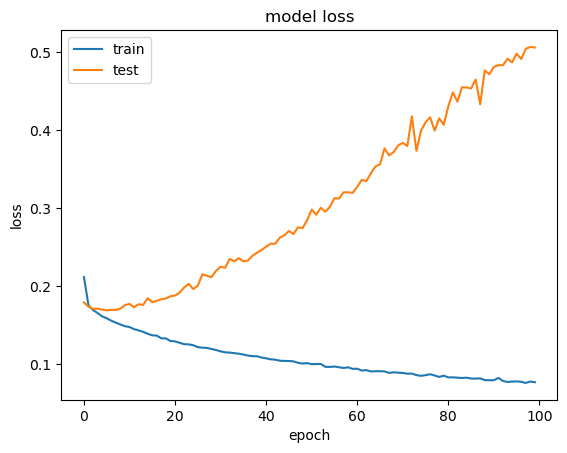

In [49]:
# Fitting the ANN to the Training set
history=model.fit(x1_train_scaled, y1_train, batch_size = 10, epochs=100,validation_split=0.3, verbose = 0)
# Predicting the Test set results
y_pred_prob = model.predict(x1_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y1_test, y_pred_prob)

model.summary()
test_results = model.evaluate(x1_test_scaled, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)

In [50]:
model = Sequential()
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

247/247 [==============================] - 1s 4ms/step
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                1792      
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 0.2029 - accuracy: 0.9229
For epoch = 500, the model test accuracy is 0.9229016304016113.
The model test average precision score is 0.31259638581882493.
[[7019  112]
 [ 497  271]] 

The accuracy is 

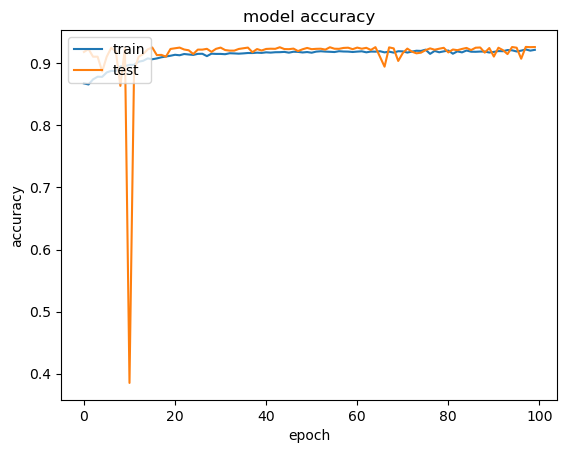

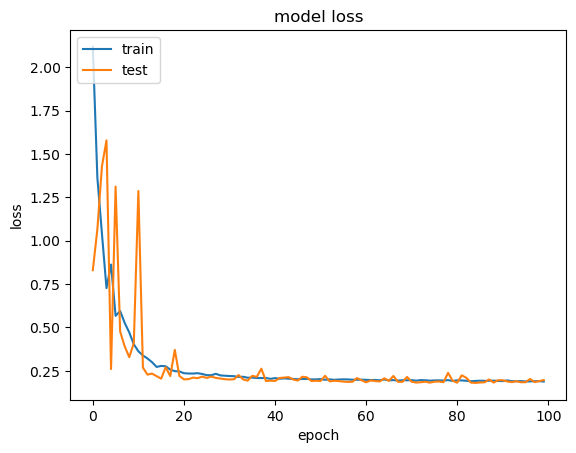

In [51]:
# Fitting the ANN to the Training set
history=model.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3, verbose=0)
# Predicting the Test set results
y_pred_prob = model.predict(x1_test)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y1_test, y_pred)
model.summary()
test_results = model.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(e,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)

<h4>Scaled Dataset</h4>

247/247 [==============================] - 1s 4ms/step
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                1792      
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 0.7836 - accuracy: 0.8975
For epoch = 100, the model test accuracy is 0.8974553942680359.
The model test average precision score is 0.4496383643152092.
[[6694  437]
 [ 373  395]] 

The accuracy is 0

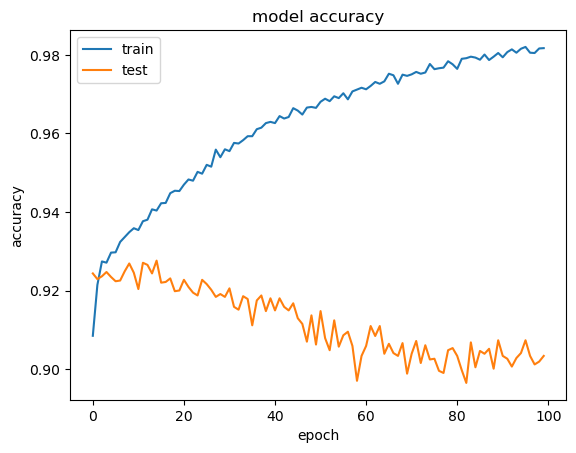

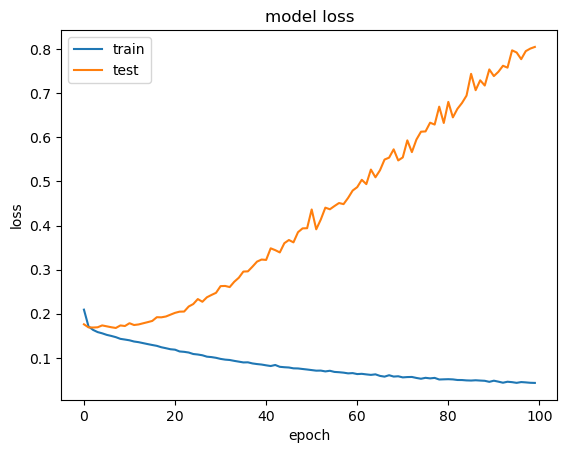

In [52]:
# Fitting the ANN to the Training set
history=model.fit(x1_train_scaled, y1_train, batch_size = 10, epochs=100,validation_split=0.3, verbose = 0)
# Predicting the Test set results
y_pred_prob = model.predict(x1_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y1_test, y_pred_prob)

model.summary()
test_results = model.evaluate(x1_test_scaled, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)

<h3>Isprobavanje razlicitih aktivacionih funkcija</h3>

In [53]:
model = Sequential()

model.add(Dense(32,activation="tanh"))
model.add(Dense(16,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

247/247 [==============================] - 1s 3ms/step
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 32)                1792      
                                                                 
 dense_29 (Dense)            (None, 16)                528       
                                                                 
 dense_30 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 0.2757 - accuracy: 0.9154
For epoch = 500, the model test accuracy is 0.915432333946228.
The model test average precision score is 0.2584965109009674.
[[7003  128]
 [ 540  228]] 

The accuracy is 0.

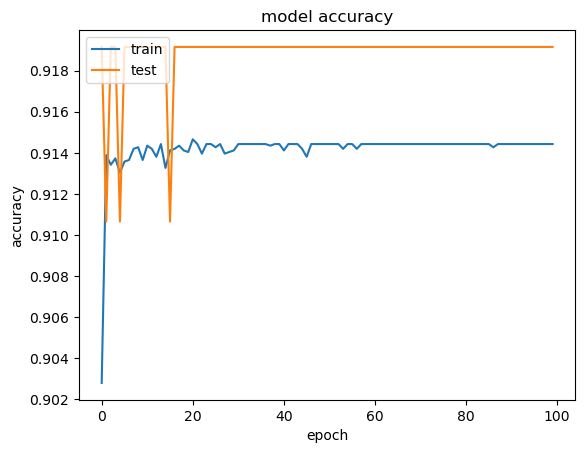

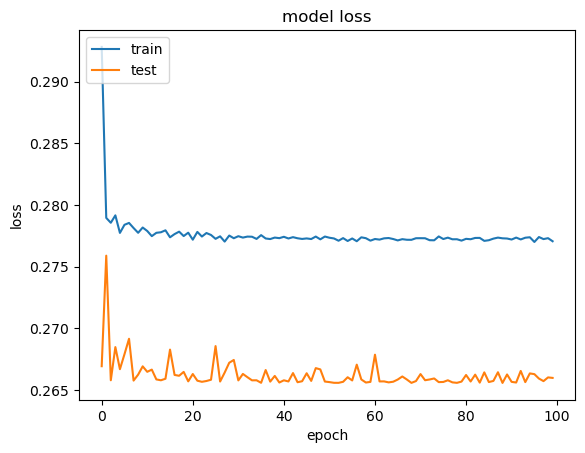

In [54]:
# Fitting the ANN to the Training set
history=model.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3, verbose=0)
# Predicting the Test set results
y_pred_prob = model.predict(x1_test)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y1_test, y_pred)
model.summary()
test_results = model.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(e,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)

<h4>Scaled Dataset</h4>

247/247 [==============================] - 1s 4ms/step
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 32)                1792      
                                                                 
 dense_29 (Dense)            (None, 16)                528       
                                                                 
 dense_30 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 0.5635 - accuracy: 0.8976
For epoch = 100, the model test accuracy is 0.8975819945335388.
The model test average precision score is 0.46062269129378053.
[[6718  413]
 [ 396  372]] 

The accuracy is 

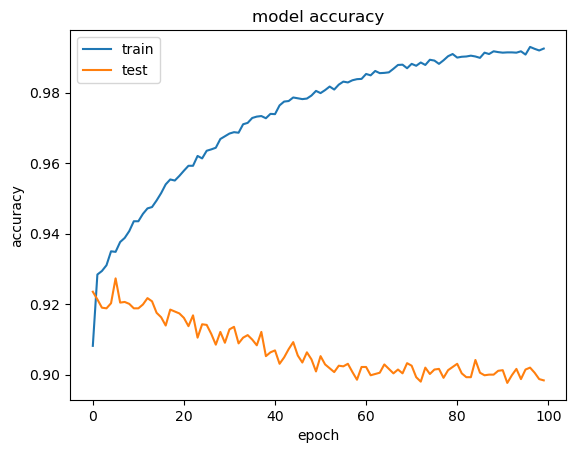

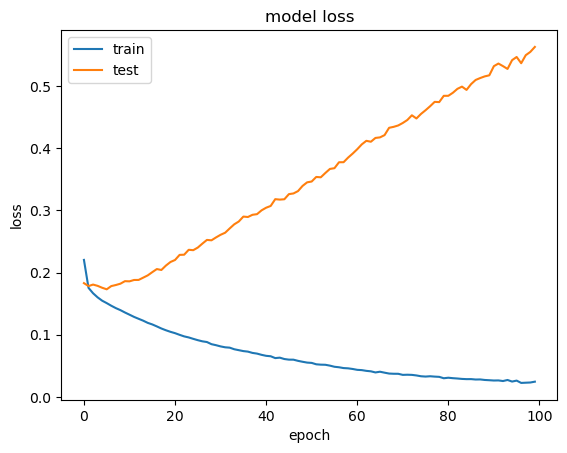

In [55]:
# Fitting the ANN to the Training set
history=model.fit(x1_train_scaled, y1_train, batch_size = 10, epochs=100,validation_split=0.3, verbose = 0)
# Predicting the Test set results
y_pred_prob = model.predict(x1_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y1_test, y_pred_prob)

model.summary()
test_results = model.evaluate(x1_test_scaled, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)

In [56]:
model = Sequential()

model.add(Dense(32,activation="sigmoid"))
model.add(Dense(16,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

247/247 [==============================] - 1s 3ms/step
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 32)                1792      
                                                                 
 dense_32 (Dense)            (None, 16)                528       
                                                                 
 dense_33 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 0.3190 - accuracy: 0.9028
For epoch = 500, the model test accuracy is 0.9027724862098694.
The model test average precision score is 0.09722749715153817.
[[7131    0]
 [ 768    0]] 

The accuracy is

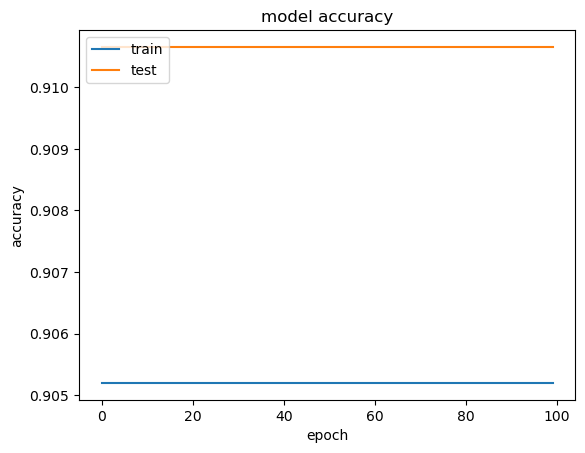

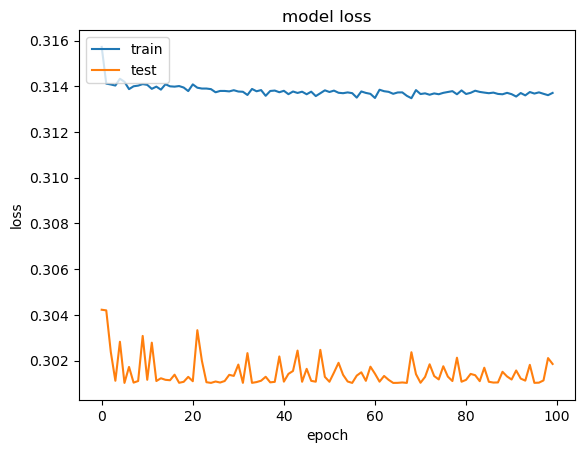

In [57]:
# Fitting the ANN to the Training set
history=model.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3, verbose=0)
# Predicting the Test set results
y_pred_prob = model.predict(x1_test)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y1_test, y_pred)
model.summary()
test_results = model.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(e,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)

<h4>Scaled Dataset</h4>

247/247 [==============================] - 1s 3ms/step
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 32)                1792      
                                                                 
 dense_32 (Dense)            (None, 16)                528       
                                                                 
 dense_33 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 0.4257 - accuracy: 0.9032
For epoch = 100, the model test accuracy is 0.9031522870063782.
The model test average precision score is 0.47203052426140624.
[[6761  370]
 [ 395  373]] 

The accuracy is

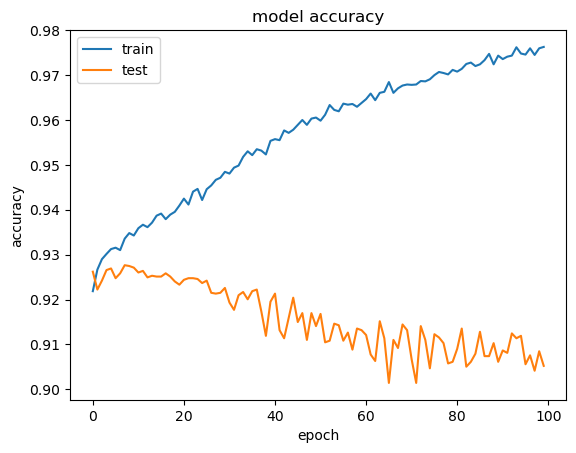

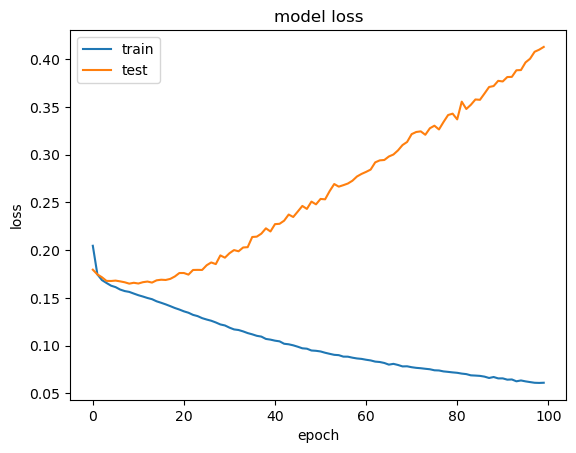

In [58]:
# Fitting the ANN to the Training set
history=model.fit(x1_train_scaled, y1_train, batch_size = 10, epochs=100,validation_split=0.3, verbose = 0)
# Predicting the Test set results
y_pred_prob = model.predict(x1_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y1_test, y_pred_prob)

model.summary()
test_results = model.evaluate(x1_test_scaled, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)

In [59]:
model = Sequential()

model.add(Dense(32,activation="softmax"))
model.add(Dense(16,activation="softmax"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

247/247 [==============================] - 1s 4ms/step
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 32)                1792      
                                                                 
 dense_35 (Dense)            (None, 16)                528       
                                                                 
 dense_36 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 0.3190 - accuracy: 0.9028
For epoch = 500, the model test accuracy is 0.9027724862098694.
The model test average precision score is 0.09722749715153817.
[[7131    0]
 [ 768    0]] 

The accuracy is

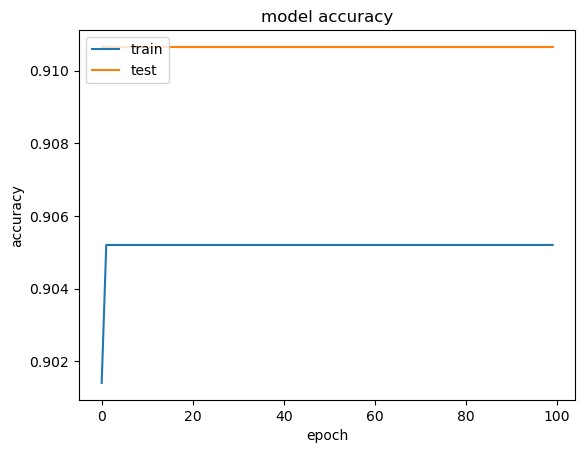

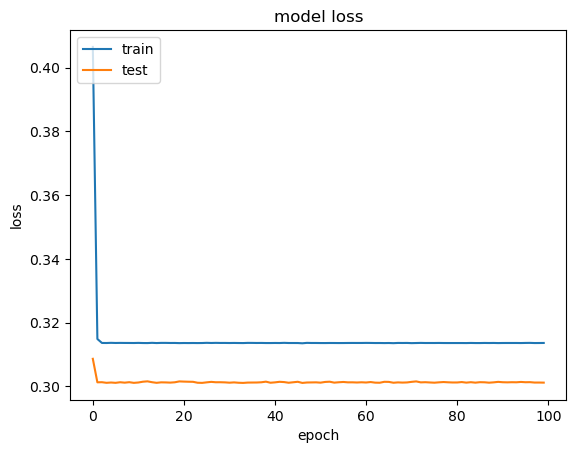

In [60]:
# Fitting the ANN to the Training set
history=model.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3, verbose=0)
# Predicting the Test set results
y_pred_prob = model.predict(x1_test)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y1_test, y_pred)
model.summary()
test_results = model.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(e,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)

<h4>Scaled Dataset</h4>

247/247 [==============================] - 1s 4ms/step
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 32)                1792      
                                                                 
 dense_35 (Dense)            (None, 16)                528       
                                                                 
 dense_36 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________
For epoch = 100, the model test accuracy is 0.9044182896614075.
The model test average precision score is 0.43360511791977757.
[[6726  405]
 [ 350  418]] 

The accuracy is 0.9044182807950374
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


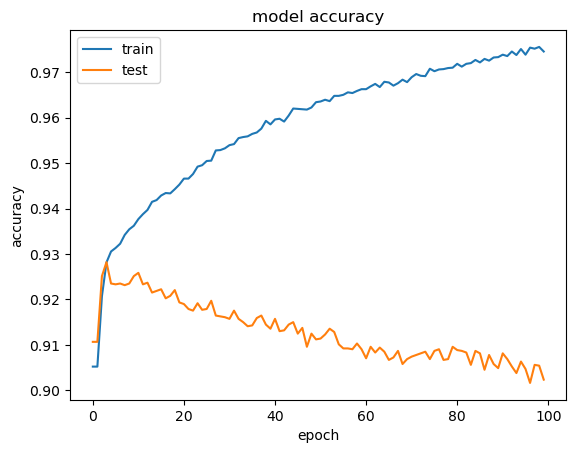

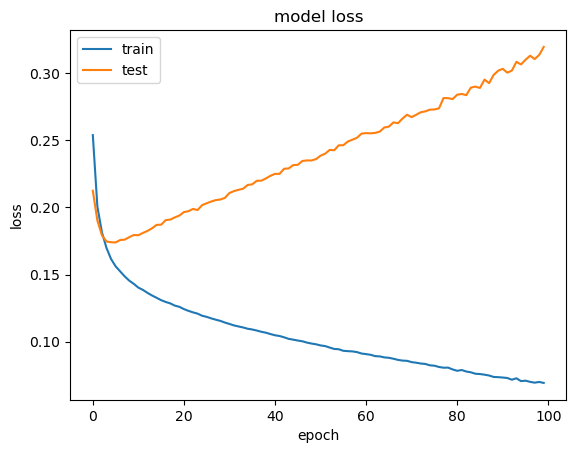

In [61]:
# Fitting the ANN to the Training set
history=model.fit(x1_train_scaled, y1_train, batch_size = 10, epochs=100,validation_split=0.3, verbose = 0)
# Predicting the Test set results
y_pred_prob = model.predict(x1_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y1_test, y_pred_prob)

model.summary()
test_results = model.evaluate(x1_test_scaled, y1_test, verbose = 0)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)

<h2>Podesavanje optimizer-a</h2>

Optimizer:  sgd
247/247 [==============================] - 0s 1ms/step
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 32)                1792      
                                                                 
 dense_31 (Dense)            (None, 16)                528       
                                                                 
 dense_32 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.9028
For epoch = 100, the model test accuracy is 0.9027724862098694.
The model test average precision score is 0.09722749715153817.
[[7131    0]
 [ 768    0]] 


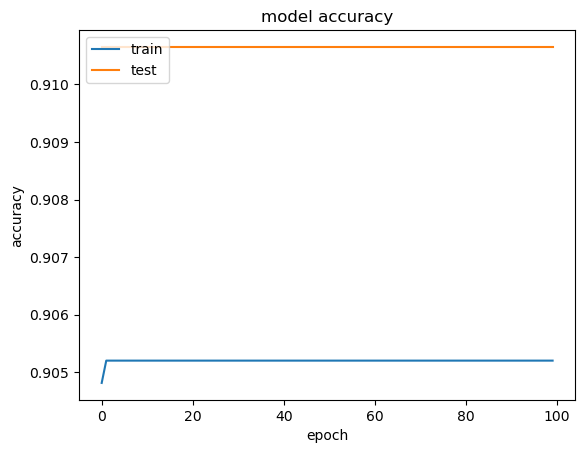

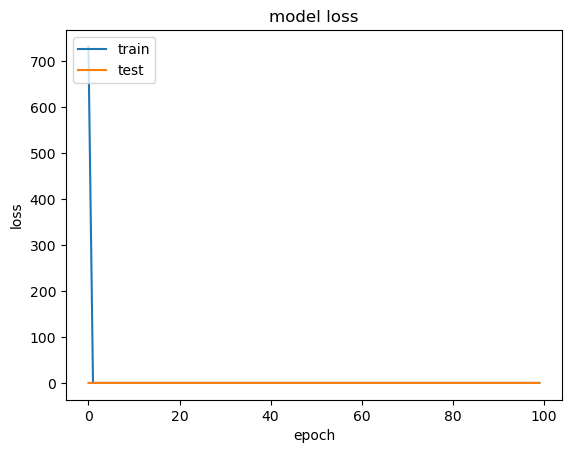

Optimizer:  rmsprop
247/247 [==============================] - 0s 1ms/step
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 32)                1792      
                                                                 
 dense_34 (Dense)            (None, 16)                528       
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 0s 1ms/step - loss: 0.2040 - accuracy: 0.9194
For epoch = 100, the model test accuracy is 0.9193568825721741.
The model test average precision score is 0.2658973589801175.
[[7061   70]
 [ 567  201]

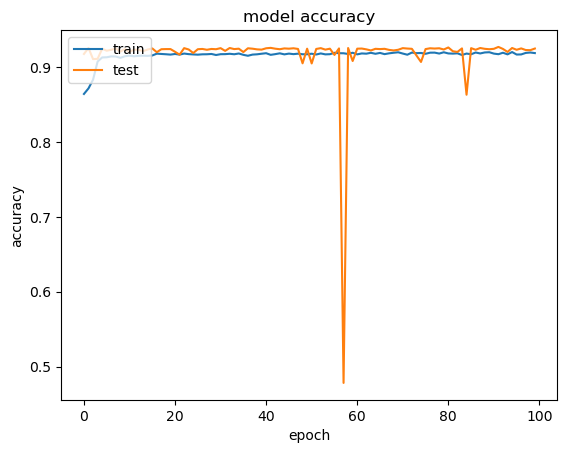

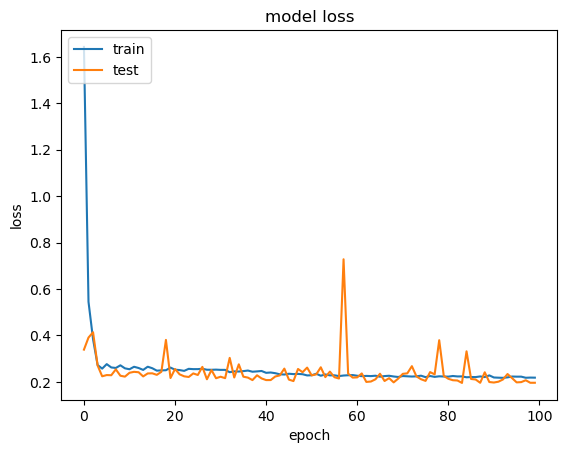

Optimizer:  adam
247/247 [==============================] - 0s 1ms/step
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 32)                1792      
                                                                 
 dense_37 (Dense)            (None, 16)                528       
                                                                 
 dense_38 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 0s 1ms/step - loss: 0.2037 - accuracy: 0.9216
For epoch = 100, the model test accuracy is 0.921635627746582.
The model test average precision score is 0.2962151135095985.
[[7033   98]
 [ 521  247]] 



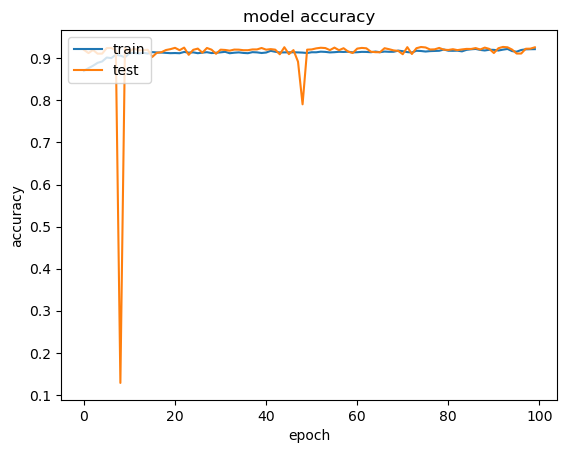

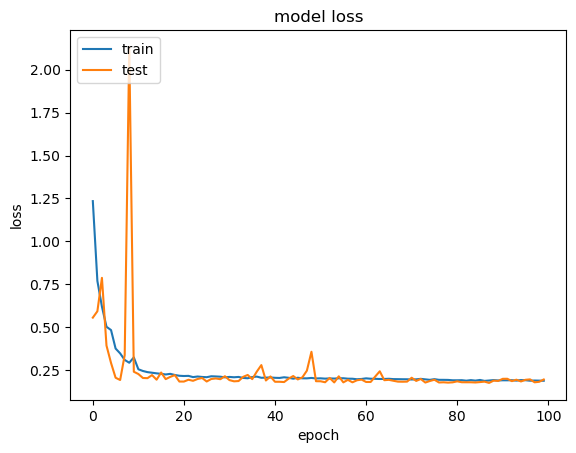

Optimizer:  adagrad
247/247 [==============================] - 0s 1ms/step
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 32)                1792      
                                                                 
 dense_40 (Dense)            (None, 16)                528       
                                                                 
 dense_41 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 0s 1ms/step - loss: 0.2622 - accuracy: 0.8988
For epoch = 100, the model test accuracy is 0.8988479375839233.
The model test average precision score is 0.23607781891825036.
[[6817  314]
 [ 485  283

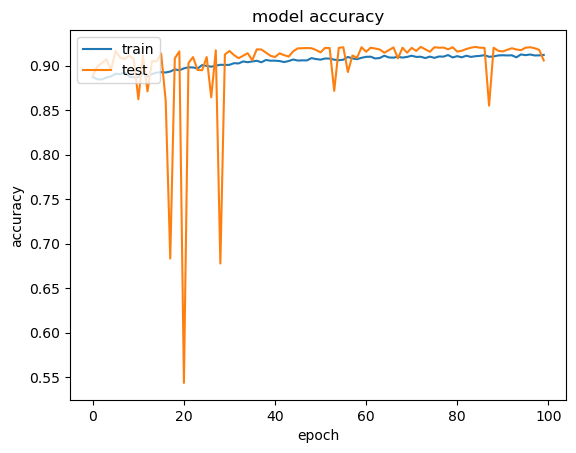

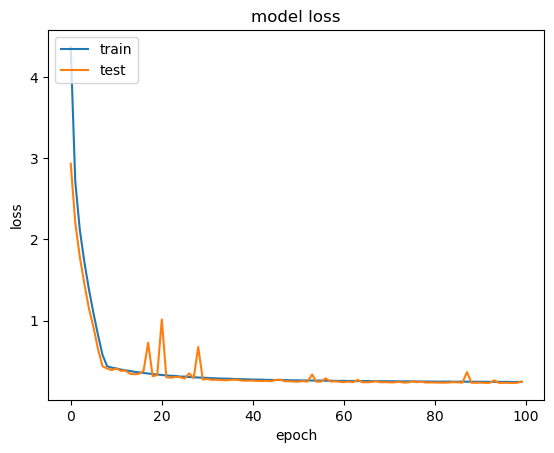

Optimizer:  adadelta
247/247 [==============================] - 0s 1ms/step
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 32)                1792      
                                                                 
 dense_43 (Dense)            (None, 16)                528       
                                                                 
 dense_44 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8975
For epoch = 100, the model test accuracy is 0.8974553942680359.
The model test average precision score is 0.20428175863347045.
[[6861  270]
 [ 540  22

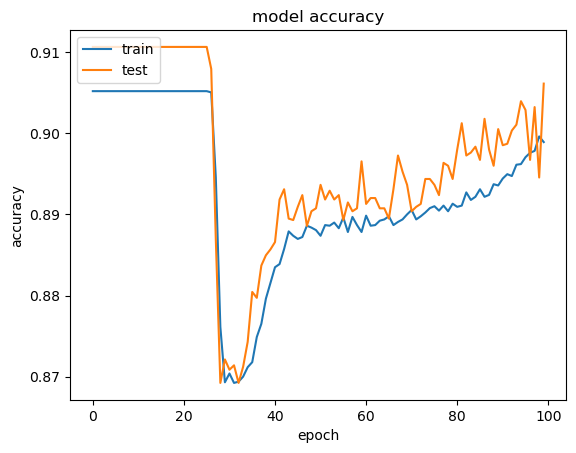

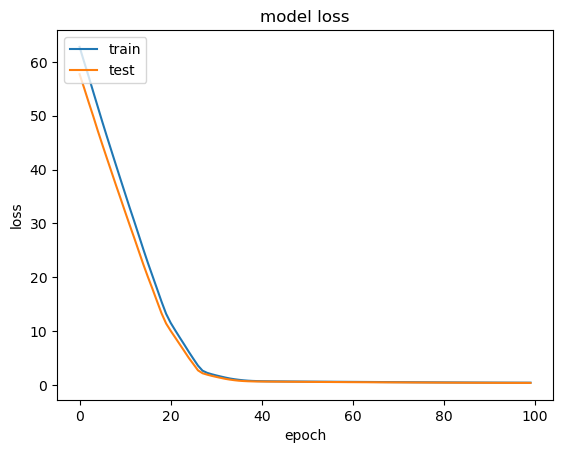

Optimizer:  nadam
247/247 [==============================] - 0s 1ms/step
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 32)                1792      
                                                                 
 dense_46 (Dense)            (None, 16)                528       
                                                                 
 dense_47 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 0s 1ms/step - loss: 0.1906 - accuracy: 0.9173
For epoch = 100, the model test accuracy is 0.9173312783241272.
The model test average precision score is 0.3654426913344654.
[[6817  314]
 [ 339  429]] 

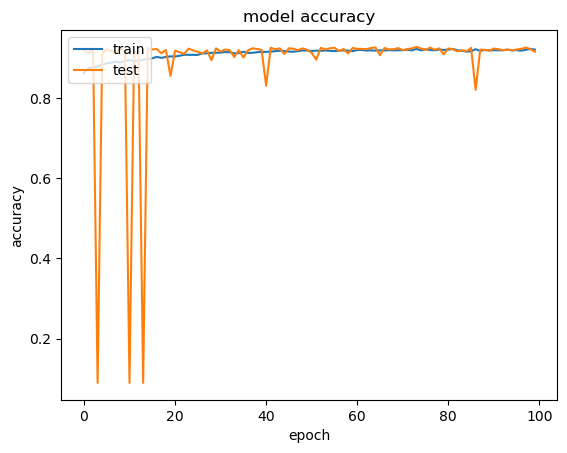

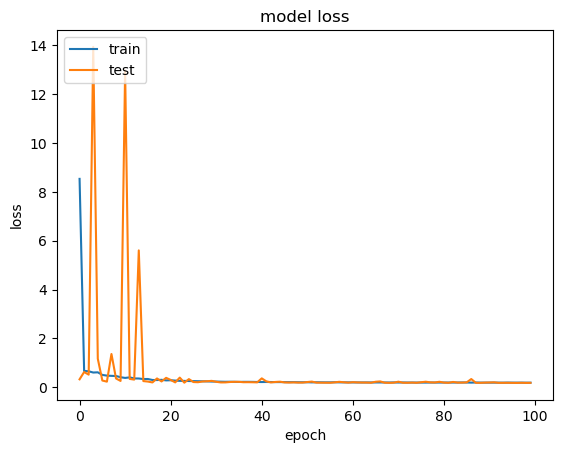

In [36]:
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, Nadam

optimizers = ['sgd', 'rmsprop', 'adam', 'adagrad', 'adadelta', 'nadam']

for optimizer in optimizers:
    model = Sequential()
    model.add(Dense(32,activation="relu"))
    model.add(Dense(16,activation="relu"))
    model.add(Dense(1,activation="sigmoid"))
    
    print("Optimizer: ", optimizer)
    model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    # Fitting the ANN to the Training set
    history=model.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3, verbose=0)
    # Predicting the Test set results
    y_pred_prob = model.predict(x1_test)
    y_pred = (y_pred_prob > 0.5).astype(int)  
    pre_score = sk.average_precision_score(y1_test, y_pred)
    model.summary()
    test_results = model.evaluate(x1_test, y1_test)
    print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
    print("The model test average precision score is {}.".format(pre_score))
    confusionmat(y1_test,y_pred)
    learningcurve(history)

<h2>Podesavanje learning rate-a</h2>

<h3>ReduceLROnPlateau</h3>

247/247 [==============================] - 0s 1ms/step
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 32)                1792      
                                                                 
 dense_49 (Dense)            (None, 16)                528       
                                                                 
 dense_50 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 0s 1ms/step - loss: 0.3053 - accuracy: 0.9051
For epoch = 100, the model test accuracy is 0.9050512909889221.
The model test average precision score is 0.21400548302462463.
[[6938  193]
 [ 557  211]] 

The accuracy is

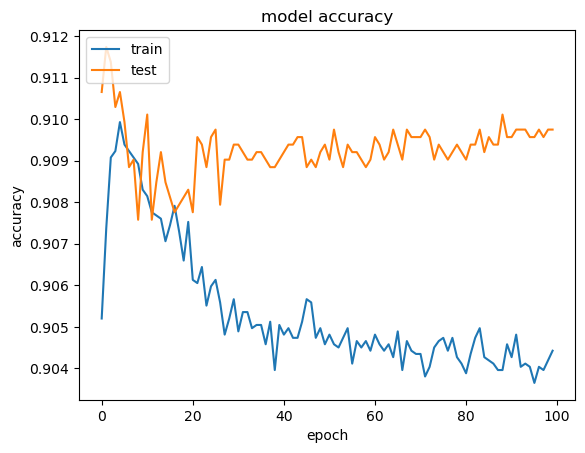

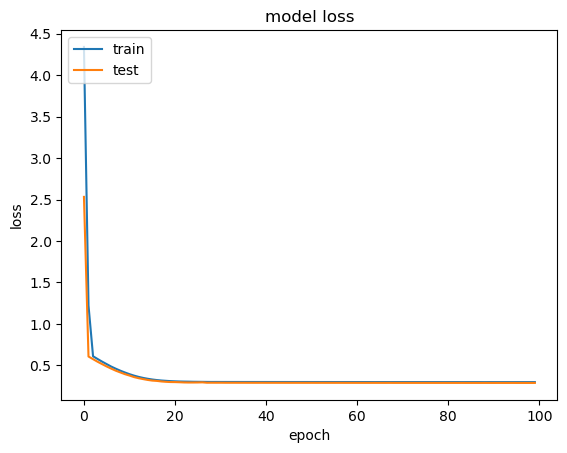

In [38]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.0001)

model = Sequential()
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer = 'adadelta', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training set
history=model.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3, verbose=0, callbacks=[reduce_lr])
# Predicting the Test set results
y_pred_prob = model.predict(x1_test)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y1_test, y_pred)
model.summary()
test_results = model.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)

<h3>LearningRateScheduler i SGD optimizer</h3>

247/247 [==============================] - 0s 1ms/step
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 32)                1792      
                                                                 
 dense_52 (Dense)            (None, 16)                528       
                                                                 
 dense_53 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 0s 1ms/step - loss: 114.5533 - accuracy: 0.0972
For epoch = 100, the model test accuracy is 0.09722749888896942.
The model test average precision score is 0.09722749715153817.
[[   0 7131]
 [   0  768]] 

The accuracy

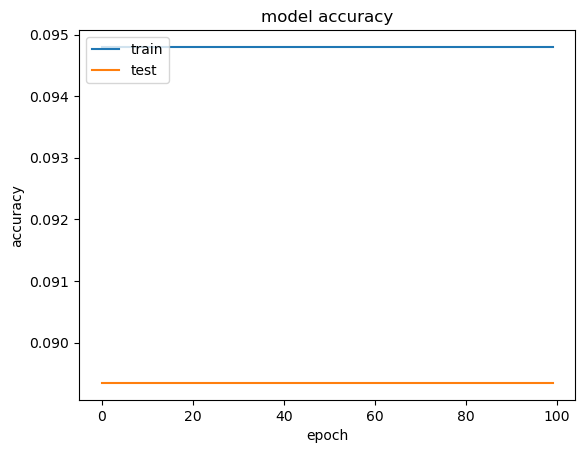

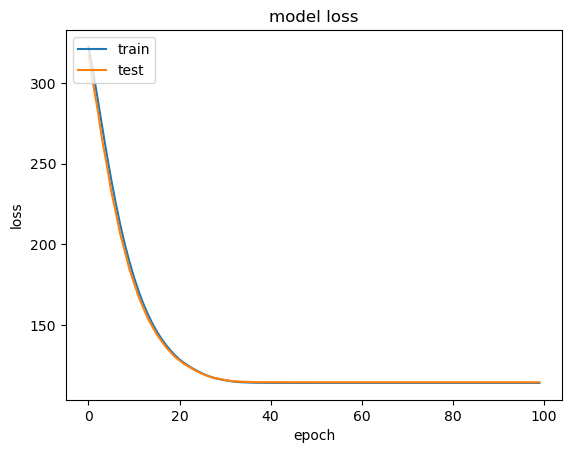

In [39]:
from keras.callbacks import LearningRateScheduler

epoch = 100
lr_sched = LearningRateScheduler(lambda epoch: 1e-4 * (0.75 ** np.floor(epoch / 2)))

model = Sequential()
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer = 'adadelta', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training set
history=model.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3, verbose=0, callbacks=[lr_sched])
# Predicting the Test set results
y_pred_prob = model.predict(x1_test)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y1_test, y_pred)
model.summary()
test_results = model.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)

<h2>Custom loss funkcija</h2>

In [55]:
from keras import backend as K

def custom_loss(y_true, y_pred):
    y_true = K.cast(y_true, dtype='float32')
    loss = K.binary_crossentropy(y_true, y_pred)
    
    penalty = 0.1
    false_positive_penalty = K.mean(K.maximum(y_pred - y_true, 0))
    false_negative_penalty = K.mean(K.maximum(y_true - y_pred, 0))
    loss = loss + penalty * (false_positive_penalty + false_negative_penalty)
    
    return loss

In [56]:
model = Sequential()
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer = 'adadelta', loss = custom_loss, metrics=['accuracy'])

247/247 [==============================] - 0s 1ms/step
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 32)                1792      
                                                                 
 dense_82 (Dense)            (None, 16)                528       
                                                                 
 dense_83 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 0s 1ms/step - loss: 1.5040 - accuracy: 0.9067
For epoch = 100, the model test accuracy is 0.9066970348358154.
The model test average precision score is 0.23753180273967753.
[[6915  216]
 [ 521  247]] 

The accuracy is

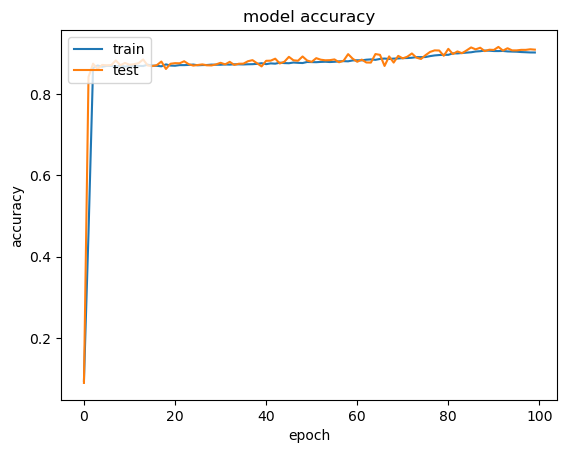

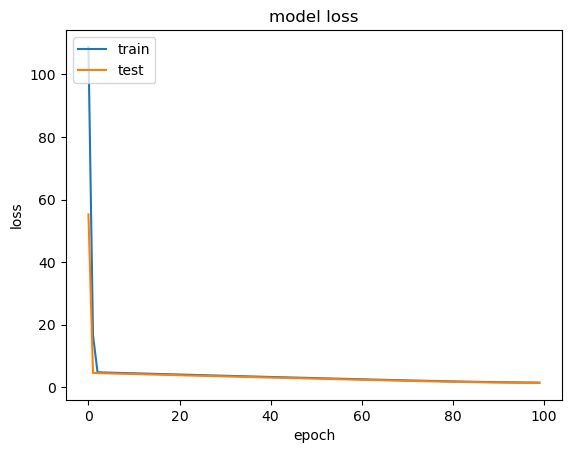

In [57]:
# Fitting the ANN to the Training set
history=model.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3, verbose=0)
# Predicting the Test set results
y_pred_prob = model.predict(x1_test)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y1_test, y_pred)
model.summary()
test_results = model.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)